In [39]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

In [14]:
print("shape of data : ", fashion_mnist['data'].shape)
print("shape of target : ", fashion_mnist['target'].shape)

shape of data :  (70000, 784)
shape of target :  (70000,)


In [15]:
X = fashion_mnist['data'].to_numpy()
Y = fashion_mnist['target'].to_numpy()

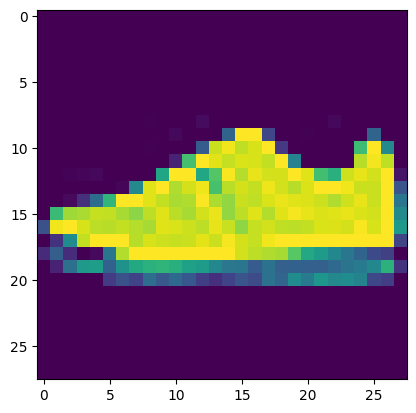

In [23]:
random_index = np.random.randint(0, len(Y))
plt.imshow(X[random_index].reshape(28, 28))
plt.show()

In [40]:
standard_X = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)

In [44]:
sample_covariance_matrix = (1/len(Y))*np.matmul(standard_X.T, standard_X)

In [51]:
print(np.allclose(sample_covariance_matrix, np.cov(standard_X.T, ddof=0)))

True


In [53]:
eigen_vals, eigen_vecs = np.linalg.eig(sample_covariance_matrix)
print("eigen values : ", eigen_vals.shape)
print("eigen vectors : ", eigen_vecs.shape)

eigen values :  (784,)
eigen vectors :  (784, 784)


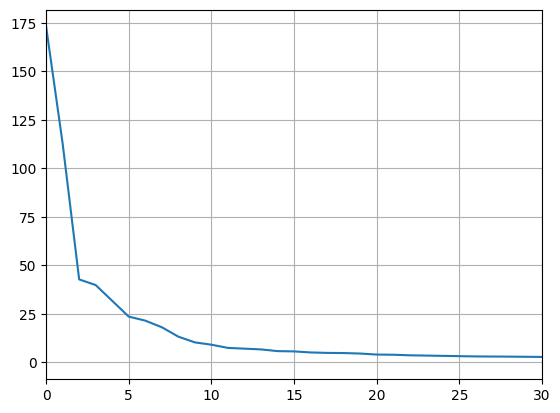

In [63]:
sorted_eigen_values = sorted(eigen_vals, reverse=True)
plt.plot(sorted_eigen_values)
plt.grid()
plt.xlim([0, 30])
plt.show()

In [86]:
U = eigen_vecs[0:400].T
U.shape

(784, 400)

In [87]:
X_PCA = np.matmul(U.T, standard_X.T)

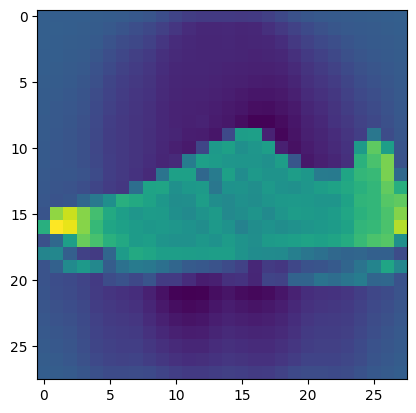

In [89]:
plt.imshow(standard_X[random_index].reshape(28, 28))

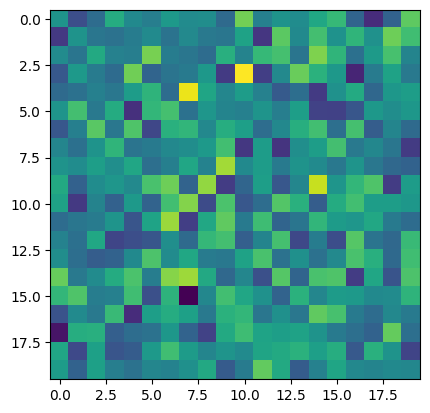

In [88]:
plt.imshow(X_PCA.T[random_index].reshape(20, 20))
plt.show()

Eigenvalues: [1.73203569e+02 1.12916423e+02 4.28333024e+01 3.99049226e+01
 3.17926060e+01 2.36382459e+01 2.15709878e+01 1.81627219e+01
 1.33081430e+01 1.03597844e+01 9.15853007e+00 7.52001002e+00
 7.13219789e+00 6.73956782e+00 5.86259138e+00 5.71023322e+00
 5.17781099e+00 4.94296795e+00 4.87128082e+00 4.60595449e+00
 4.09038480e+00 3.99703783e+00 3.70026173e+00 3.54747233e+00
 3.43385079e+00 3.28231119e+00 3.12121295e+00 3.08302692e+00
 3.01634647e+00 2.92552129e+00 2.85461680e+00 2.78235974e+00
 2.70427789e+00 2.60552658e+00 2.55610809e+00 2.47738500e+00
 2.44241956e+00 2.35441944e+00 2.23879440e+00 2.21578241e+00
 2.15654521e+00 2.10314350e+00 2.05594943e+00 1.99720549e+00
 1.93677437e+00 1.88342753e+00 1.86493903e+00 1.78066270e+00
 1.74029768e+00 1.67878746e+00 1.64786823e+00 1.61902932e+00
 1.57980685e+00 1.56798854e+00 1.55131168e+00 1.50275220e+00
 1.47874514e+00 1.44712968e+00 1.39521625e+00 1.38795367e+00
 1.36295387e+00 1.34745981e+00 1.32397764e+00 1.27145437e+00
 1.24958343

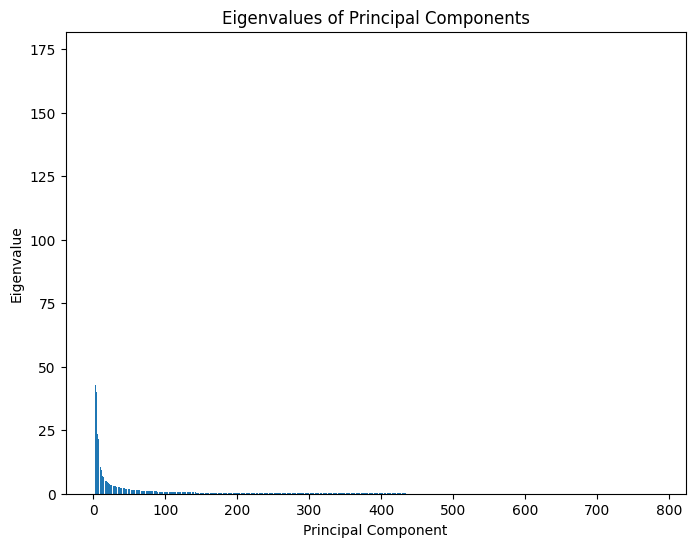

In [64]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(standard_X)
# Eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()

